# Klasteryzacja danych

Źródło: https://www.springboard.com/blog/data-mining-python-tutorial/

Źródło danych: https://github.com/barneygovan/from-data-with-love

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import sklearn
from sklearn import cluster

faithful = pd.read_csv("faithful.csv")
faithful.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


Text(0, 0.5, 'Time between eruptions (minutes)')

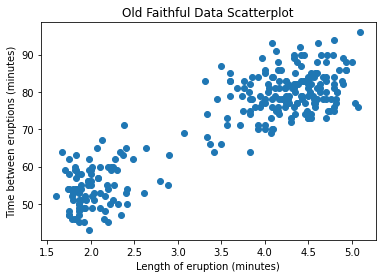

In [2]:
faithful.columns = ['eruptions', 'waiting']

plt.scatter(faithful.eruptions, faithful.waiting)
plt.title('Old Faithful Data Scatterplot')
plt.xlabel('Length of eruption (minutes)')
plt.ylabel('Time between eruptions (minutes)')

In [3]:
faith = np.array(faithful)

k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(faith)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

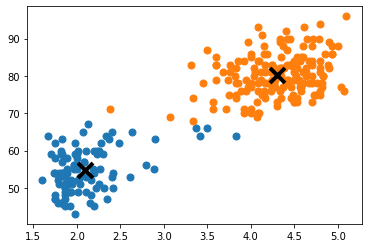

In [4]:
for i in range(k):
    # select only data observations with cluster label == i
    ds = faith[np.where(labels==i)]
    # plot the data observations
    plt.plot(ds[:,0],ds[:,1],'o', markersize=7)
    # plot the centroids
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=4.0)
plt.show()